In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),   # Convolutional layer
    layers.MaxPooling2D((2, 2)),                                            # Max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),                            # Convolutional layer
    layers.MaxPooling2D((2, 2)),                                            # Max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),                            # Convolutional layer
    layers.Flatten(),                                                       # Flatten the 2D output to 1D
    layers.Dense(64, activation='relu'),                                    # Fully connected layer
    layers.Dense(10, activation='softmax')                                  # Output layer with 10 neurons (for 10 digits)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.9012 - loss: 0.3207
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9851 - loss: 0.0480
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9904 - loss: 0.0313
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9925 - loss: 0.0228
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9942 - loss: 0.0178


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9881 - loss: 0.0351


In [9]:
print(f"Test accuracy: {test_acc}")


Test accuracy: 0.9909999966621399


In [10]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


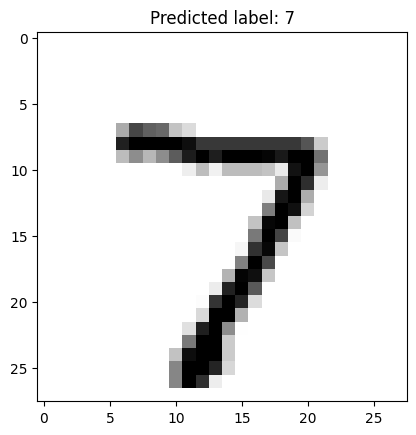

In [11]:
plt.imshow(test_images[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted label: {np.argmax(predictions[0])}")
plt.show()

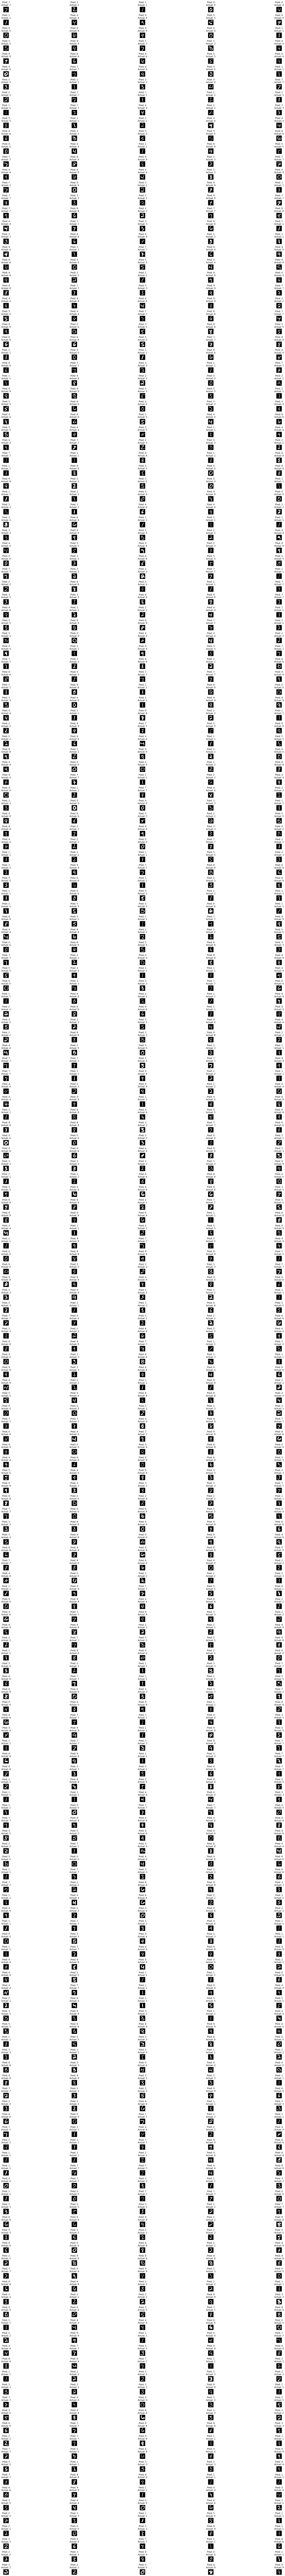

In [24]:
plt.figure(figsize=(30, 200))  # Adjusted the figsize for better visibility
for i in range(1000):
    plt.subplot(200, 5, i+1)  # 200 rows, 5 columns (1000 images in total)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')  # Reshape to 28x28 for correct display
    predicted_label = np.argmax(predictions[i])  # Get the predicted label
    actual_label = test_labels[i]  # Get the actual label
    plt.title(f"Pred: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')  # Hide axis
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()